## Teamwork from Team 2 ( Jan 30th 2018 )## 

** Authors: Zhangjie LV, Kaisheng LIAN, Shurui LIU, Yuhong ZHU, Liling HUANG **

** Date: Jan 30th 2018 **

** Exercise 1 **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
class KernelDensityEstimater:
    def __init__(self,α=2,β=2, n=100):
        self.n, self.α ,self.β = n, α, β
        
    def generate_sample(self):
        self.q = beta(self.α, self.β)
        obs = self.q.rvs(self.n)
        self.sample = obs
        return self.sample
    
    def bandwidth(self,sample):
        self.σ= sample.std()
        self.h = ((4*self.σ**5)/(3*self.n))**(1/5)
        return self.h
    
    def KernelDensity_generator(self):
        self.sample = self.generate_sample()
        self.h = self.bandwidth(self.sample)
        self.part_sum = 0
        x_grid = np.linspace(0.01,0.99,self.n)
        def f(x):
            for i in range(self.n):
                self.part_sum += norm.pdf((x-self.sample[i])/self.h)
            return self.part_sum/(self.h*self.n)
        fig, ax = plt.subplots(figsize=(8,8))
        ax.plot(x_grid,self.q.pdf(x_grid),'b-',label='beta,alpha={0},beta={1}'.format(self.α,self.β))
        ax.plot(x_grid,f(x_grid),'r-',label='KernelDensityMethod')
        plt.legend()
        plt.show()

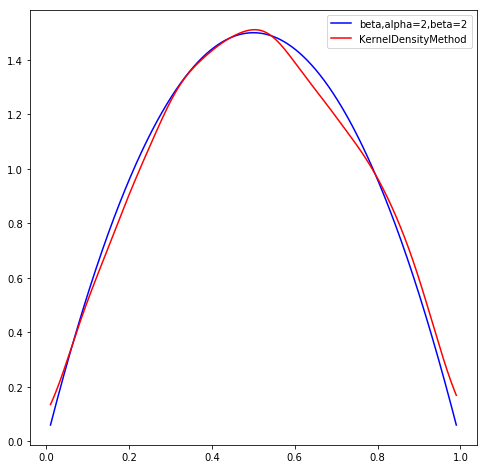

In [2]:
K = KernelDensityEstimater(n=2000)
K.KernelDensity_generator()

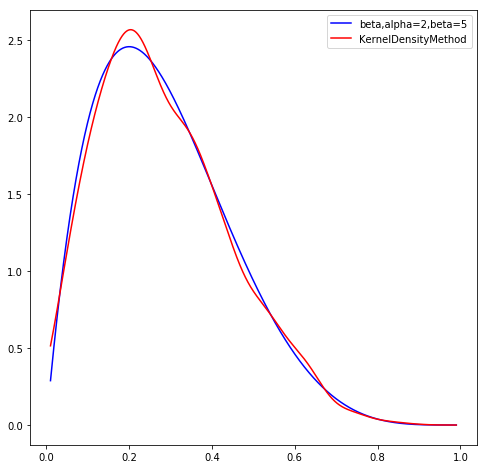

In [3]:
K = KernelDensityEstimater(2,5,n=2000)
K.KernelDensity_generator()

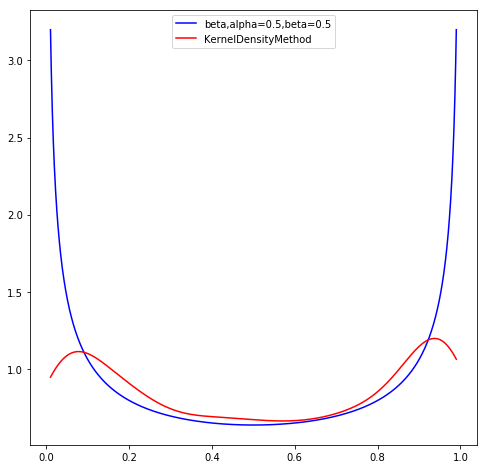

In [5]:
K = KernelDensityEstimater(0.5,0.5,n=2000)
K.KernelDensity_generator()

**It is not a good estimator for α or β smaller than 1,but it works so well for both α and β are >=1.**

** Exercise 2 **

In [16]:
def kde_plot_sample(sample,vec):
    samplesize=len(sample)
    h=1.06*np.std(sample)*samplesize**(-1/5)
    vec_kde=np.empty(len(vec))
    for i in range(len(vec)):
        vec_kde[i]= 1/len(sample)/h*np.sum(norm.pdf((vec[i]-sample)/h))
    plt.plot(vec, vec_kde , 'g--',label=r'$kde\quadX_{T+1}$')

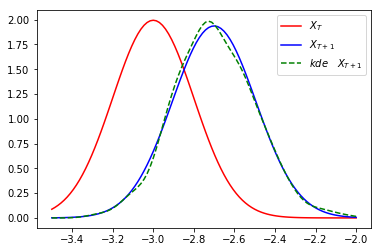

In [17]:
ρ=0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2
n=1000
e_t1= np.random.normal(0, 1, n )
x_t= np.random.normal(μ, s, n )
x_t1=ρ*x_t+b+σ*e_t1
x=np.linspace(-3.5,-2,100)
y=norm.pdf(x,μ, s)
z=norm.pdf(x,ρ*μ,np.sqrt(s*s*ρ*ρ+σ*σ))
plt.plot(x, y,'r',label=r'$X_{T}$')
plt.plot(x, z,'b',label=r'$X_{T+1}$')
kde_plot_sample(x_t1,x)
plt.legend()
plt.show()

We find that the bulit-in function KernelDensity fails to converge to the theoretical distribution of $x_{t+1}$. Therefore, we set up a new function named kde_plot_sample. 

The new function turns out to fit the $x_{t+1}$ distribution well.